In [1]:
# Step 1: Importing libraries and data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
bc =load_breast_cancer()

We need to define the amount of training instances that will be used at each cross-validation set with train_sizes = [50,100,150,200,250,300], instantitate the base learner, and call learning_curve.

The function returns a tuple of the train set sizes, the in-sample performance scores, and out-of-sample performance scores. 

The function accepts the base learner, the dataset features and targets, and the train set sizes as parameters in a list with train_sizes=train_sizes and the number of corss validation folds with cv = 10

In [3]:
# Step 2: We will create in-sample and out-of sample scores
x, y = bc.data, bc.target
learner = KNeighborsClassifier()
train_sizes = [50, 100, 150, 200, 250, 300]
train_sizes, train_scores, test_scores = learning_curve(learner, x, y, train_sizes=train_sizes, cv=10)

In [4]:
# Step 3: We will canculate the mean and standard deviation of in-sample and out of sample performance
# We will calcuate the average and standard deviation for each hyperparameter
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

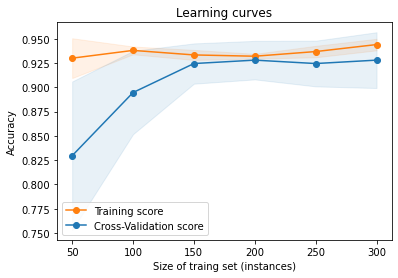

In [5]:
# Step 4: We will plot the means and standard deviations as curves and rectangeles as we did before.
# Plot the socres
plt.figure()
plt.title('Learning curves')
# Plot the standard deviations
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color="C1")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color="C0")
# Plot the means
plt.plot(train_sizes, train_scores_mean,'o-', color="C1", label="Training score")
plt.plot(train_sizes, test_scores_mean,'o-', color="C0", label="Cross-Validation score")

plt.xticks(train_sizes)
plt.xlabel('Size of traing set (instances)')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()

The model seems to reduce its variance for the first 200 training samples. After that, it seems that the means diverge, as well as the standard deviation of the cross-validation score increasing, thus indicating an increase in variance.

Note that, although both curves have the accuracy above 90% for training sets with at least 150 instances, this does not imply low bias.

Datasets that are highly separable (good quality data with low noise) tend to produce such curves-no matter what combination of algorithms and hyperparameters we choose. 

Moreover, noisy datasets (for example, instances with the same features that have different targets) will not be able to produce high accuracy models- no matter what technique we use.

Therefore, bias must be measured by comparing the learning and validation curves to a desired accuracy (one that is considered achievable given the dataset quality), rather than its absolute value.